## Wine Data Set

In [1]:
# Import libraries 
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from collections import Counter

In [2]:
file = 'wine.data'
wine_df = pd.read_csv(file, names=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium',
                                   'Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins',
                                   'Color_intensity','Hue','OD280/OD315_of_diluted wines','Proline'])
wine_df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Univariate Analysis

In [3]:
# shape of our dataframe
wine_shape = wine_df.shape

print(f'number of observations: {wine_shape[0]}')
print(f'number of columns: {wine_shape[1]}')

number of observations: 178
number of columns: 14


In [4]:
# columns of or data set
wine_columns= wine_df.columns.tolist()
print("The columns are: ")
wine_columns

The columns are: 


['Class',
 'Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total_phenols',
 'Flavanoids',
 'Nonflavanoid_phenols',
 'Proanthocyanins',
 'Color_intensity',
 'Hue',
 'OD280/OD315_of_diluted wines',
 'Proline']

In [5]:
# characteristics of wine_df
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [6]:
# Data (storage) Type
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total_phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid_phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color_intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315_of_diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [7]:
#values null
wine_df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280/OD315_of_diluted wines    0
Proline                         0
dtype: int64

In [8]:
clase = ('1', '2', '3')
wine_df['Class'].unique()
Counter(wine_df['Class'])

Counter({1: 59, 2: 71, 3: 48})

([<matplotlib.patches.Wedge at 0x1dd81e82470>,
 [Text(0.8333922823240062, 1.424063658606168, 'Class:1'),
  Text(-1.6190019242036555, -0.3183280845682036, 'Class:2'),
  Text(1.0924746457250492, -1.2365270512398543, 'Class:3')],
 [Text(0.45457760854036694, 0.7767619956033641, '33.1%'),
  Text(-0.8830919586565392, -0.1736335006735656, '39.9%'),
  Text(0.5958952613045722, -0.6744693006762841, '27.0%')])

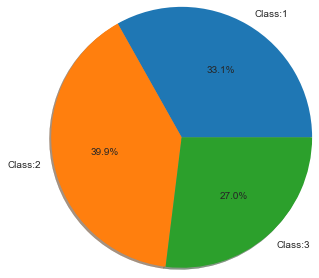

In [9]:
# Print the percentage of our class in the data set
Class_count=[59,71,48]
Class_labels=['Class:1','Class:2','Class:3',]
plt.pie(Class_count, labels=Class_labels, radius=1.5,autopct='%0.1f%%',shadow=True)

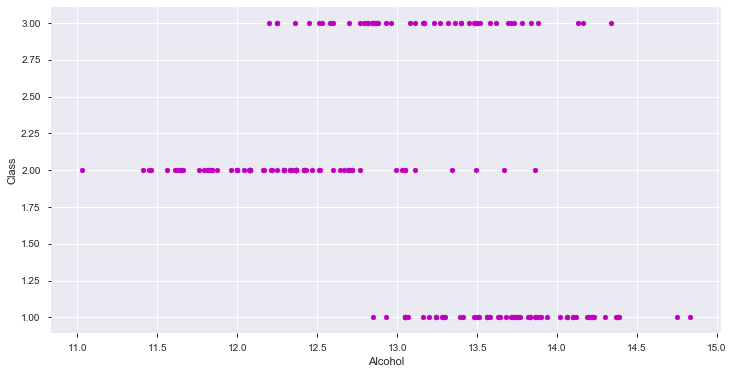

In [10]:
# create a graph for see the level of alcohol in the diferences class
plt.rcParams['figure.figsize'] = (12,6)
wine_df.plot.scatter(x = 'Alcohol', y = 'Class', s=25, c='m')

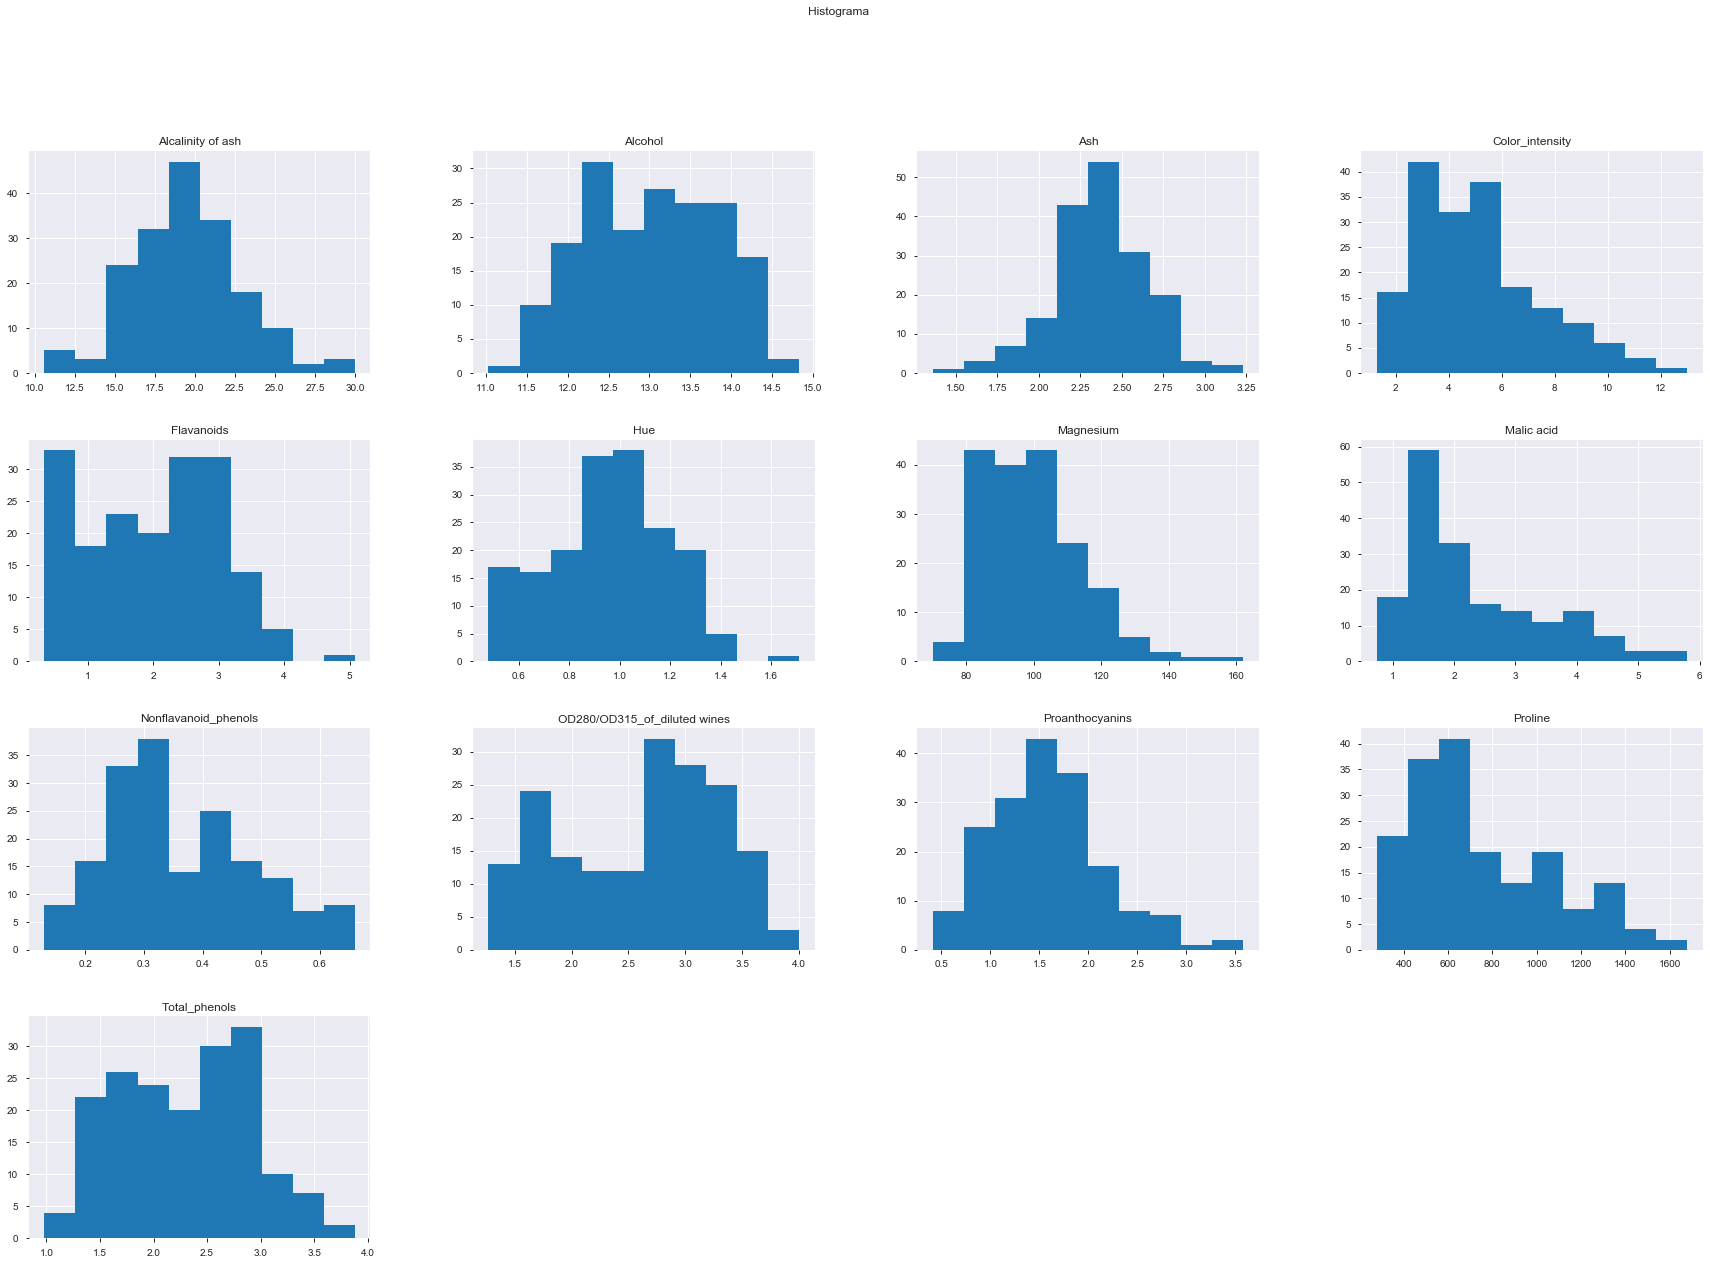

In [11]:
 # variable distribution
wine_df.hist(figsize=(30,20), column = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total_phenols',
                                        'Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity',
                                        'Hue','OD280/OD315_of_diluted wines','Proline'])
plt.suptitle('Histograma')
plt.show()

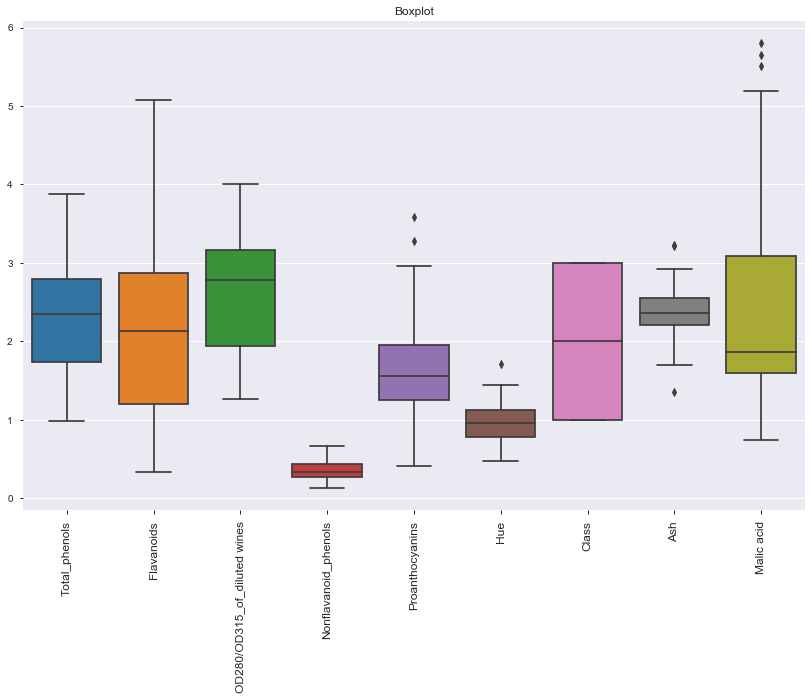

In [12]:
plt.rcParams['figure.figsize'] = (14, 9)
c=set(wine_df.columns.tolist())-set(['Proline', 'Magnesium', 'Alcalinity of ash', 'Color_intensity','Alcalinity of ash', 'Alcohol'])
c=list(c)
g=sns.boxplot(data=wine_df[c])
g.set_xticklabels(g.get_xticklabels(),rotation=90, fontsize=12)
plt.title("Boxplot")
plt.show()

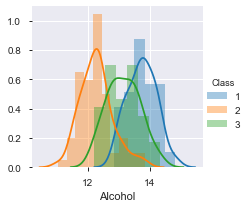

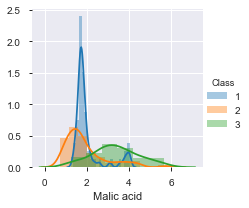

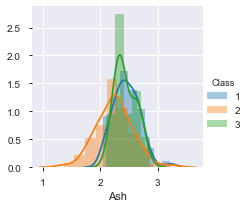

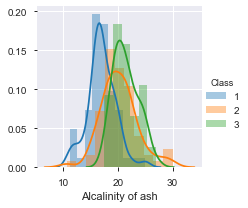

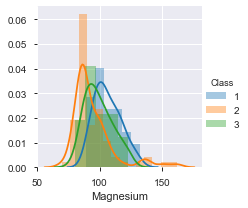

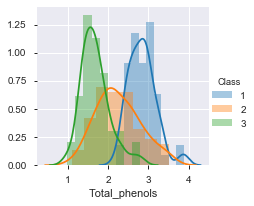

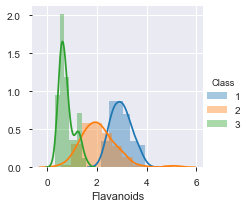

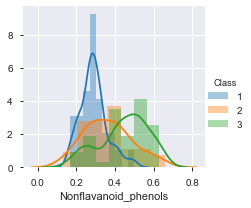

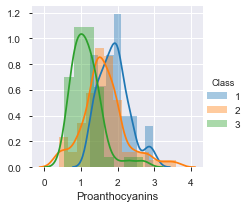

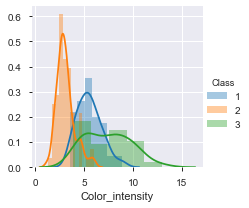

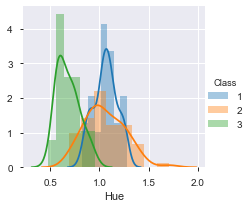

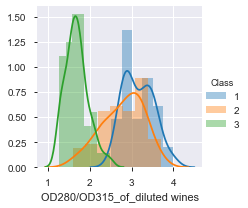

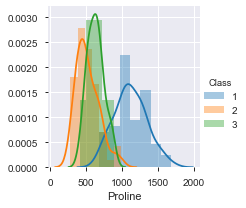

In [13]:
# Seaborn Distribution
for column in wine_df.columns[1:14]:
    g = sns.FacetGrid(wine_df, hue = 'Class')
    g = g.map(sns.distplot, column)
    g = g.add_legend()
    plt.show()

In [14]:
# Variable Means 
wine_df.groupby(by = 'Class').mean().T # cambia filas por columnas

Class,1,2,3
Alcohol,13.744746,12.278732,13.153750
Malic acid,2.010678,1.932676,3.333750
Ash,2.455593,2.244789,2.437083
Alcalinity of ash,17.037288,20.238028,21.416667
Magnesium,106.338983,94.549296,99.312500
Total_phenols,2.840169,2.258873,1.678750
Flavanoids,2.982373,2.080845,0.781458
Nonflavanoid_phenols,0.290000,0.363662,0.447500
Proanthocyanins,1.899322,1.630282,1.153542
Color_intensity,5.528305,3.086620,7.396250


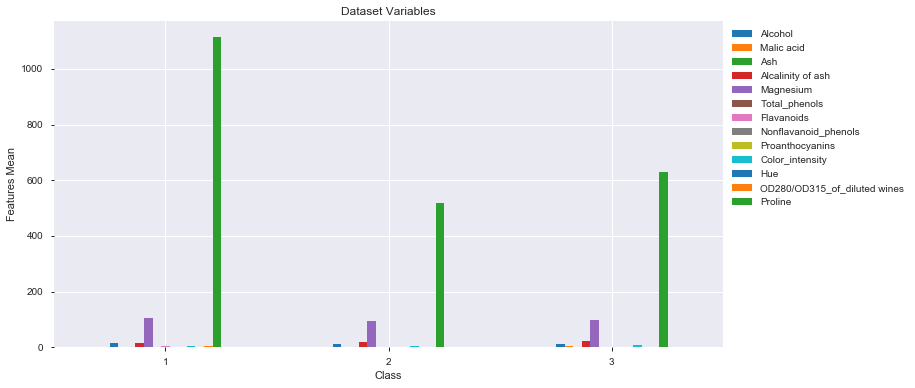

In [18]:
plt.rcParams['figure.figsize'] = (12, 6)
wine_df.groupby(by = 'Class').mean().plot(kind = 'bar')
plt.title('Dataset Variables')
plt.ylabel('Features Mean')
plt.xticks(rotation=0)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

In [19]:
dd1=wine_df.drop(columns=['Alcalinity of ash', 'Magnesium', 'Proline'])

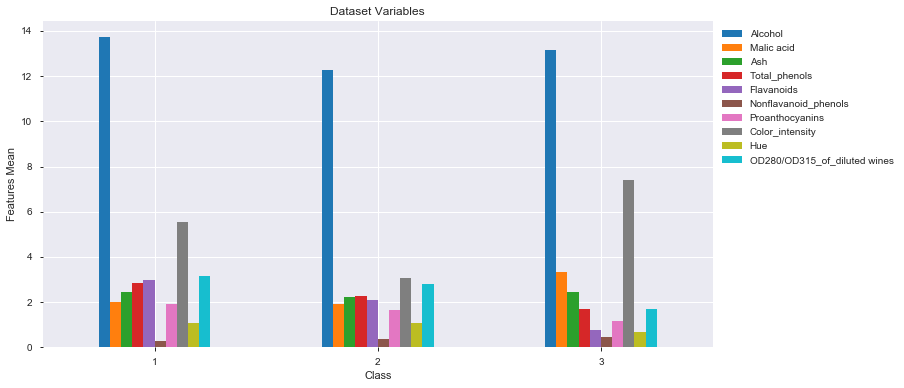

In [20]:
plt.rcParams['figure.figsize'] = (12, 6)
dd1.groupby(by = 'Class').mean().plot(kind = 'bar')
plt.title('Dataset Variables')
plt.ylabel('Features Mean')
plt.xticks(rotation=0)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

## Multivariate Analysis

In [27]:
# create a data frame without the variable class for so there are no mistakes
wine_corr = wine_df[['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium',
                                   'Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins',
                                   'Color_intensity','Hue','OD280/OD315_of_diluted wines','Proline']]

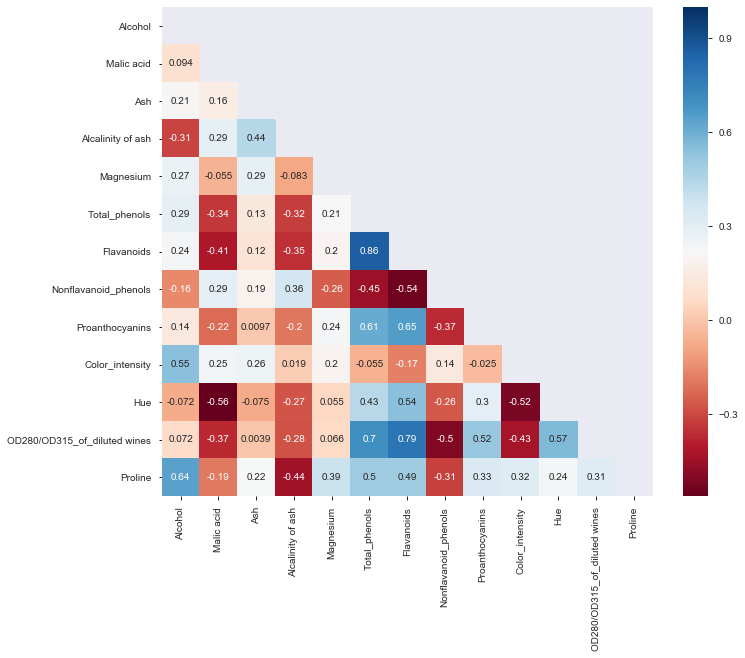

In [28]:
# correlation matrix
correlation_matrix = wine_corr.corr()

# heatmap
mask = np.zeros_like (correlation_matrix, dtype = np.bool) 
mask[np.triu_indices_from (mask)] = True 
plt.figure(figsize=(11,9))
sns.heatmap(correlation_matrix, annot = True, cmap = 'RdBu', mask=mask)
plt.show()

Text(0, 0.5, 'Flavanoids')

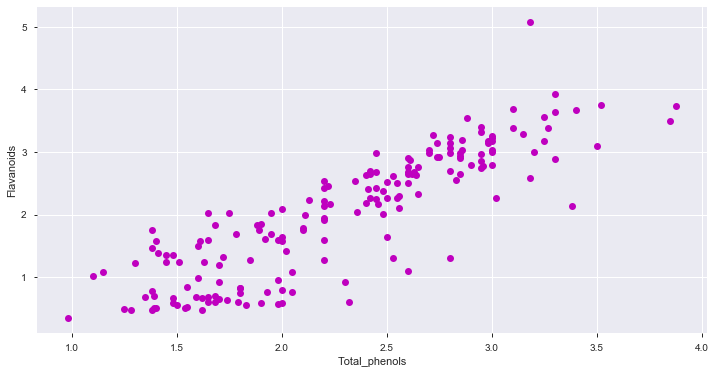

In [35]:
# print the graph for corroborate the correlation +
plt.plot(wine_df['Total_phenols'], wine_df['Flavanoids'], marker='o',c='m',linestyle="")
plt.xlabel('Total_phenols')
plt.ylabel('Flavanoids')

In [36]:
#sns.lmplot(x='Total_phenols', y ='Flavanoids', data=wine_df, fit_reg=True)

Text(0, 0.5, 'Hue')

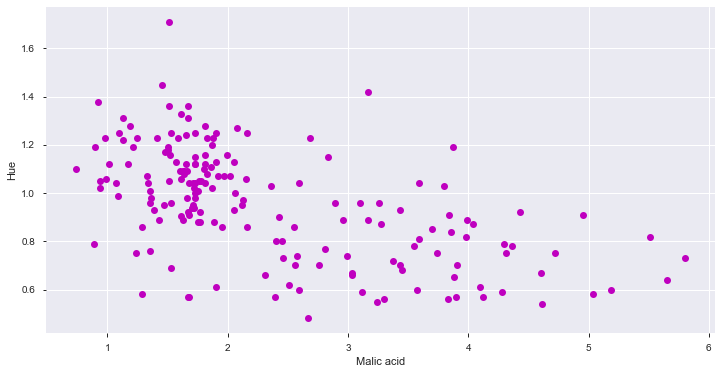

In [34]:
# print the graph for corroborate the correlation -
plt.plot(wine_df['Malic acid'], wine_df['Hue'], marker='o',c='m',linestyle="")
plt.xlabel('Malic acid')
plt.ylabel('Hue')

In [37]:
#sns.lmplot(x='Malic acid', y ='Hue', data=wine_df, fit_reg=True)